In [ ]:
pip install plotly
pip install kneed

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

In [3]:
city_years = {
 'London':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [4]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data/UK/Greater_London'
dir_list = os.listdir(path)
print(dir_list)

['Greater_London_2017.csv', 'Greater_London_2016.csv', 'Greater_London_2018.csv', 'Greater_London_2019.csv', 'Greater_London_2022.csv', 'Greater_London_2023.csv', 'Greater_London_2021.csv', 'Greater_London_2020.csv']


In [5]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data//UK/Greater_London/Greater_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['London'][2016].head()

Loading:  London 2016
Loading:  London 2017
Loading:  London 2018
Loading:  London 2019
Loading:  London 2020
Loading:  London 2021
Loading:  London 2022
Loading:  London 2023


,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,2588415,2016-01-17 11:18:24,2016-01-17,2016-01-17 11:18:24+00:00,Europe/Dublin,2016-01-17T11:44:39+00:00,2023-03-18T01:33:42+00:00,Larvae in well-rotted compost heap.,484,needs_id,...,subfamily,48201.0,False,False,False,233631.0,233631.0,"[{'user_id': 484, 'category': 'leading', 'disa...",6.0,Weekend
1,2612357,Sun Jan 24 2016 11:53:47 GMT+0000 (GMT),2016-01-24,2016-01-24 11:53:47+00:00,Etc/UTC,2016-01-24T11:54:01+00:00,2017-03-17T22:32:23+00:00,NaN,171828,casual,...,kingdom,48460.0,False,False,False,86602042.0,86602042.0,"[{'user_id': 477, 'category': 'improving', 'di...",6.0,Weekend
2,2627816,2016-01-24 9:22:14 am GMT+00:00,2016-01-24,2016-01-24 09:22:14+00:00,Africa/Casablanca,2016-01-29T18:15:09+00:00,2024-03-12T14:56:58+00:00,Flying overhead,85926,casual,...,species,18899.0,False,False,False,22854.0,22854.0,"[{'user_id': 85926, 'category': 'leading', 'di...",6.0,Weekend
3,2627819,2016-01-24 2:24:34 pm GMT+00:00,2016-01-24,2016-01-24 14:24:34+00:00,Africa/Casablanca,2016-01-29T18:15:15+00:00,2024-03-12T14:56:58+00:00,3 overhead,85926,casual,...,species,5265.0,True,False,False,25945.0,25945.0,"[{'user_id': 85926, 'category': 'leading', 'di...",6.0,Weekend
4,2642709,Wed Feb 03 2016 18:00:37 GMT+0000 (GMT),2016-02-03,2016-02-03 18:00:37+00:00,Etc/UTC,2016-02-03T23:34:07+00:00,2021-10-29T23:41:45+00:00,NaN,175832,casual,...,species,43583.0,True,False,False,112951.0,112951.0,"[{'user_id': 175832, 'category': 'maverick', '...",2.0,Weekday


In [6]:
sf_2016 = dfs['London'][2016]
sf_2017 = dfs['London'][2017]
sf_2018 = dfs['London'][2018]
sf_2019 = dfs['London'][2019]
sf_2020 = dfs['London'][2020]
sf_2021 = dfs['London'][2021]
sf_2022 = dfs['London'][2022]
sf_2023 = dfs['London'][2023]

In [7]:
sf_2016.head()

,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,2588415,2016-01-17 11:18:24,2016-01-17,2016-01-17 11:18:24+00:00,Europe/Dublin,2016-01-17T11:44:39+00:00,2023-03-18T01:33:42+00:00,Larvae in well-rotted compost heap.,484,needs_id,...,subfamily,48201.0,False,False,False,233631.0,233631.0,"[{'user_id': 484, 'category': 'leading', 'disa...",6.0,Weekend
1,2612357,Sun Jan 24 2016 11:53:47 GMT+0000 (GMT),2016-01-24,2016-01-24 11:53:47+00:00,Etc/UTC,2016-01-24T11:54:01+00:00,2017-03-17T22:32:23+00:00,NaN,171828,casual,...,kingdom,48460.0,False,False,False,86602042.0,86602042.0,"[{'user_id': 477, 'category': 'improving', 'di...",6.0,Weekend
2,2627816,2016-01-24 9:22:14 am GMT+00:00,2016-01-24,2016-01-24 09:22:14+00:00,Africa/Casablanca,2016-01-29T18:15:09+00:00,2024-03-12T14:56:58+00:00,Flying overhead,85926,casual,...,species,18899.0,False,False,False,22854.0,22854.0,"[{'user_id': 85926, 'category': 'leading', 'di...",6.0,Weekend
3,2627819,2016-01-24 2:24:34 pm GMT+00:00,2016-01-24,2016-01-24 14:24:34+00:00,Africa/Casablanca,2016-01-29T18:15:15+00:00,2024-03-12T14:56:58+00:00,3 overhead,85926,casual,...,species,5265.0,True,False,False,25945.0,25945.0,"[{'user_id': 85926, 'category': 'leading', 'di...",6.0,Weekend
4,2642709,Wed Feb 03 2016 18:00:37 GMT+0000 (GMT),2016-02-03,2016-02-03 18:00:37+00:00,Etc/UTC,2016-02-03T23:34:07+00:00,2021-10-29T23:41:45+00:00,NaN,175832,casual,...,species,43583.0,True,False,False,112951.0,112951.0,"[{'user_id': 175832, 'category': 'maverick', '...",2.0,Weekday


# Calculate participation

## Get number of observations and identifications

In [8]:
def get_obs_ident_per_users(dfcity,year):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
     - year: int
         The year corresponding to the observations data.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | year | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id],
            'day_type': row['day_type'],  # Include the 'day_type' column in the result
            'year': year,
            'time_observed_at': row['time_observed_at']
            
            
        })
    
    # Create DataFrame from the list of dictionaries
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident

In [9]:
# Initialize empty dictionary to store results for each year
sf_dataframes = {}

# Iterate over the years
for year in range(2016, 2024):
    # Extract DataFrame for the current year and city 'SF'
    dfcity = dfs['London'][year]
    # Process data for the current year
    sf_dataframes[year] = get_obs_ident_per_users(dfcity, year)

#access dataframe for each year

In [10]:
sf_2016 = sf_dataframes[2016]
sf_2017 = sf_dataframes[2017]
sf_2018 = sf_dataframes[2018]
sf_2019 = sf_dataframes[2019]
sf_2020 = sf_dataframes[2020]
sf_2021 = sf_dataframes[2021]
sf_2022 = sf_dataframes[2022]
sf_2023 = sf_dataframes[2023]

In [11]:
df= [sf_2016,sf_2017,sf_2018,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]

In [12]:
#Test with SF_2016 dataset 

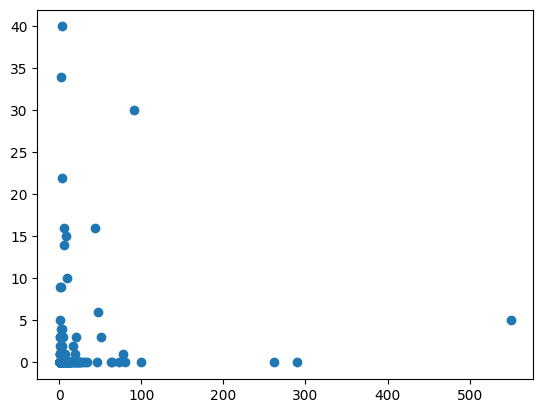

In [13]:
#Plot
plt.scatter(sf_2016['n_obs'],sf_2016['n_idents'])

In [13]:
km = KMeans(n_clusters =4)
km

KMeans(n_clusters=4)

In [ ]:
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
sf_2016['cluster'] = y_predicted
sf_2016.head()

In [ ]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]

df4 = sf_2016[sf_2016.cluster==3]
plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')


### Normalise the data 

In [13]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns
scaler.fit(sf_2016[['n_obs', 'n_idents']])

# Transform the specified columns using the scaler
sf_2016[['n_obs', 'n_idents']] = scaler.transform(sf_2016[['n_obs', 'n_idents']])
sf_2016.head()

,user_id,n_obs,n_idents,day_type,year,time_observed_at
0,1704,0.000185,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
1,5844,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
2,11548,0.000370,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
3,16603,0.023691,0.009149,Weekday,2016,2016-01-12 20:41:00+00:00
4,38816,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00


In [ ]:
km = KMeans(n_clusters =4)
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
km.cluster_centers_

In [ ]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]
df4 = sf_2016[sf_2016.cluster==3]

plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')
plt.legend()

### Elbow plot method to see the optimial number of clusters

In [ ]:
#define k range
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sf_2016[['n_obs','n_idents']])
    sse.append(km.inertia_)
    
# Find the optimal number of clusters using KneeLocator
kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

# Print the optimal number of clusters
print(f"The optimal number of clusters is {optimal_k}")

In [ ]:
sse

In [ ]:
#plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse, marker='o', label='SSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method For Optimal k for SF 2016')
plt.legend()
plt.show()

In [ ]:
#https://www.youtube.com/watch?v=EItlUEPCIzM&t=557s

# K-means step by Step

# Data Collection & Analysis

## Preprocess data for K-means without log transformation

In [14]:
def selectfeature(df):
    # Select variables 
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std

# Test dataframe
data = selectfeature(sf_2016)
#print(data)

In [15]:
featured_data = selectfeature(sf_2016)
featured_data

,user_id,n_obs,n_idents
231,54,0.003643,0.000
254,429,0.007286,0.075
0,484,0.112933,0.000
12,505,0.029144,0.000
23,819,0.010929,0.000
...,...,...,...
314,7058583,0.081967,0.000
321,7469737,0.000000,0.000
329,7720680,0.000000,0.000
331,7775033,0.000000,0.000


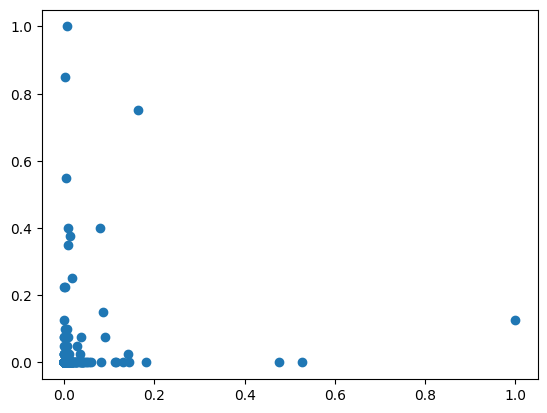

In [16]:
plt.scatter(featured_data['n_obs'],featured_data['n_idents'])

## Choosing the optimal number of clusters

In [17]:
def determine_k_clusters(df, feature_columns, plot=True):
    """
    Determines the optimal number of clusters using the Elbow Method.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the data to be clustered.
    feature_columns (list): A list of column names to be used as features for clustering.
    plot (bool): Whether to plot the Elbow Method graph. Default is True.

    Returns:
    list: A list of SSE values for each number of clusters in k_range.
    int: The optimal number of clusters.
    """
    k_range = range(1, 11)
    sse = []

    for k in k_range:
        km = KMeans(n_clusters=k)
        km.fit(df[feature_columns])
        sse.append(km.inertia_)

    # Find the optimal number of clusters using KneeLocator
    kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
    optimal_k = kneedle.elbow

    # Print the optimal number of clusters
    print(f"The optimal number of clusters is {optimal_k}")

    # Plot the SSE against k values and mark the optimal number of clusters
    if plot:
        plt.figure(figsize=(5, 4))
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Sum of squared error (SSE)')
        plt.plot(k_range, sse, marker='o', label='SSE')
        plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
        #plt.text(optimal_k, max(sse)/2, f'Optimal k={optimal_k}', color='red')
        plt.title(f'Optimal number of K - {year}', fontsize=12)
        plt.xticks(k_range)
        plt.grid(True)
        plt.legend()
        plt.show()

    return sse, optimal_k

In [18]:
def process_dataframe(df, year):
    # Selected data
    df_data = selectfeature(df)
    print(f"Processed DataFrame for year {year}:")
    print(df_data.head())

    # Determine optimal number of clusters
    sse, optimal_k = determine_k_clusters(df_data, feature_columns=['n_obs', 'n_idents'])
    
    return df_data, sse, optimal_k

Processed DataFrame for year 2016:
     user_id     n_obs  n_idents
231       54  0.003643     0.000
254      429  0.007286     0.075
0        484  0.112933     0.000
12       505  0.029144     0.000
23       819  0.010929     0.000
The optimal number of clusters is 3


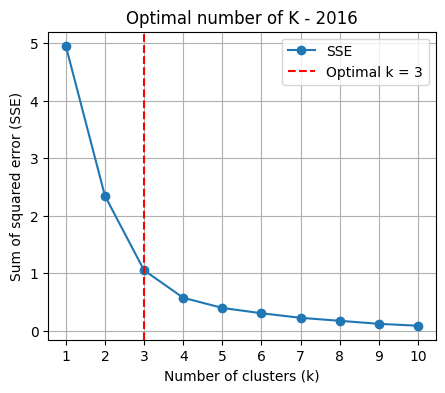

SSE for year 2016: [4.95524070469247, 2.3459979334191376, 1.051394657950587, 0.5731623315780147, 0.39668560981310136, 0.3033841835180932, 0.2243877149816157, 0.17224575434727332, 0.11975558403121007, 0.0869089113260764], Optimal k: 3
Processed DataFrame for year 2017:
     user_id     n_obs  n_idents
454       54  0.000000  0.000000
275      484  0.029322  0.010811
69       505  0.006324  0.000000
50      1245  0.000000  0.162162
39      1850  0.062668  0.000000
The optimal number of clusters is 4


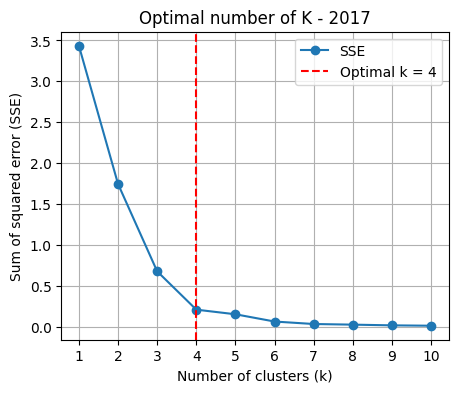

SSE for year 2017: [3.4350461605570533, 1.746395654071822, 0.6790625409449693, 0.2112660966740626, 0.1548444131679514, 0.06609212280993221, 0.03587527927265437, 0.028215243818278734, 0.019465169431657773, 0.015021471991123705], Optimal k: 4
Processed DataFrame for year 2018:
      user_id     n_obs  n_idents
1571       54  0.000778  0.000000
29        484  0.023639  0.044974
502       505  0.000933  0.000000
404      1245  0.001400  0.023810
343      2111  0.000156  0.000000
The optimal number of clusters is 3


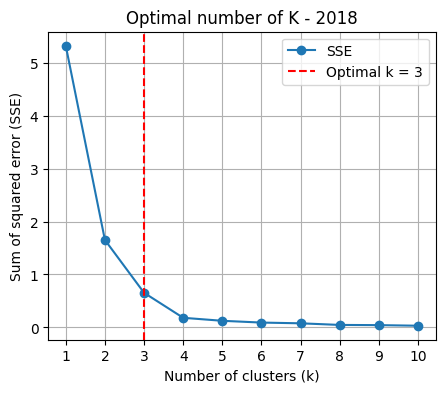

SSE for year 2018: [5.320744536211683, 1.6521641275915826, 0.654107438304874, 0.18179448816156188, 0.12514904190054751, 0.0914739940399085, 0.0775392399678564, 0.04706236968685833, 0.043168826679856394, 0.03208919458358053], Optimal k: 3
Processed DataFrame for year 2019:
      user_id     n_obs  n_idents
2226       54  0.001974       0.0
4087      429  0.000658       0.0
1287      484  0.008991       0.0
3681      520  0.009868       0.0
3653     1179  0.001974       0.0
The optimal number of clusters is 4


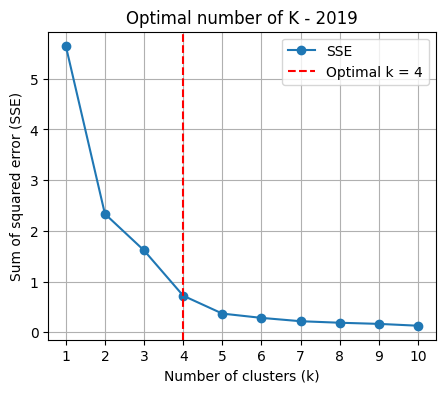

SSE for year 2019: [5.651674194240063, 2.3349955415958967, 1.6137796976644159, 0.7208753415012965, 0.36794634502372503, 0.28334613326909885, 0.21766884470064876, 0.18758168991285734, 0.16502426695123465, 0.1287415565415336], Optimal k: 4
Processed DataFrame for year 2020:
      user_id     n_obs  n_idents
1031       54  0.003888   0.00000
774       484  0.016378   0.00292
1265     1245  0.002474   0.00000
4356     1254  0.000000   0.00000
1318     1439  0.000236   0.00000
The optimal number of clusters is 3


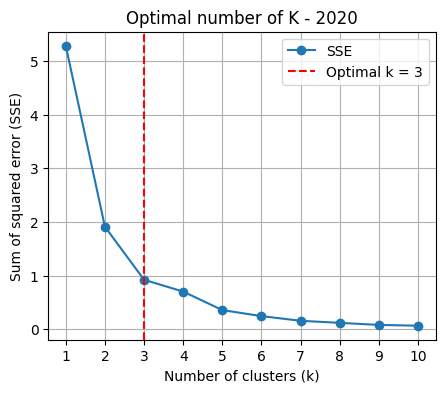

SSE for year 2020: [5.285242046829087, 1.9101603603230888, 0.9211885611506225, 0.7001775262286193, 0.35543127300656374, 0.24298202998599544, 0.15578227916116769, 0.1171806806441125, 0.07893095149688717, 0.06379198667907518], Optimal k: 3
Processed DataFrame for year 2021:
      user_id     n_obs  n_idents
2017       54  0.000676    0.0000
3093      429  0.000338    0.0005
561       484  0.000676    0.0000
95       1245  0.002027    0.0000
3739     1439  0.000000    0.0000
The optimal number of clusters is 4


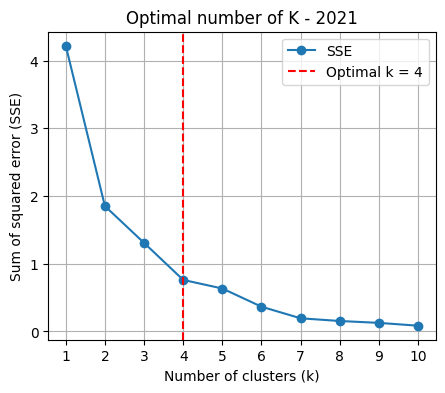

SSE for year 2021: [4.21886767021069, 1.8507394218703421, 1.3078112113899008, 0.7606732745307043, 0.6338611664829568, 0.36529712525049, 0.19394947536645205, 0.15413453238763852, 0.12638022128833698, 0.08427716461311738], Optimal k: 4
Processed DataFrame for year 2022:
      user_id     n_obs  n_idents
1182     1245  0.000615  0.000000
4975     2491  0.000000  0.000000
938      3320  0.002924  0.001435
4587     3434  0.000000  0.000000
4365     4079  0.000769  0.000110
The optimal number of clusters is 3


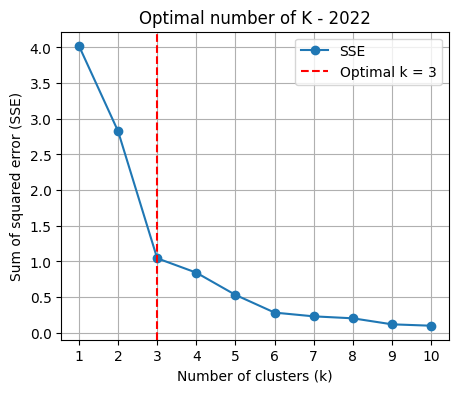

SSE for year 2022: [4.0242071080675, 2.826899607571001, 1.0440822326523982, 0.842539302638359, 0.5309408093680378, 0.28260826584991294, 0.23003428161561884, 0.20241906091101433, 0.11831063632300715, 0.09863245813282664], Optimal k: 3
Processed DataFrame for year 2023:
      user_id     n_obs  n_idents
1552      317  0.002856  0.000000
5724      355  0.000260  0.000000
5843      362  0.000000  0.004218
1445      484  0.000260  0.000000
5500      505  0.005323  0.000000
The optimal number of clusters is 4


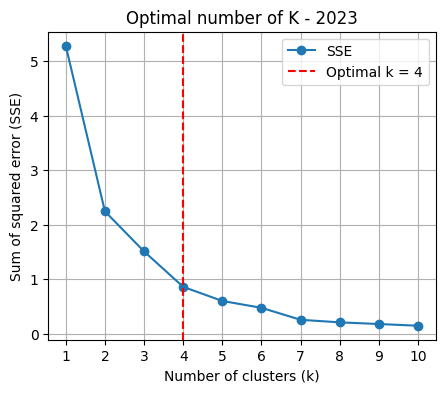

SSE for year 2023: [5.281606494258854, 2.2441166174749885, 1.5093643448167844, 0.8595026858064392, 0.6006412423546728, 0.4749904968579242, 0.2553084529386157, 0.20850337106490818, 0.17770638742113443, 0.14668366307035813], Optimal k: 4


In [19]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


# Call the function for all DataFrames
for df, year in zip(df_list, years):
    #rocess the DataFrame , see, and optimal number of cluster
    df_processed,sse, optimal_k = process_dataframe(df, year)
    print(f"SSE for year {year}: {sse}, Optimal k: {optimal_k}")

## Combine dataframe as one from year 2016- 2023

Processed DataFrame for year combined:
      user_id     n_obs  n_idents
231        54  0.000236       0.0
2226       54  0.001060       0.0
1571       54  0.000589       0.0
454        54  0.000000       0.0
1031       54  0.003888       0.0
The optimal number of clusters is 3


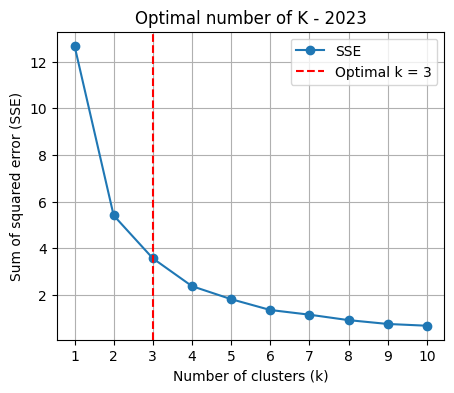

SSE for combined data: [12.677309556726218, 5.411205659279945, 3.574089368941168, 2.3833810482635913, 1.8265619701459002, 1.362597801490343, 1.161804359107233, 0.9285619294059908, 0.764507866369623, 0.6888940313221062], Optimal k: 3


In [20]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]

# merge all DataFrames
combined_df = pd.concat(df_list)

# Verify the combined DataFrame
#print("Combined DataFrame:")
#print(combined_df)

# Call the function on the combined DataFrame
df_combined_processed, sse_combined, optimal_k_combined = process_dataframe(combined_df, "combined")

print(f"SSE for combined data: {sse_combined}, Optimal k: {optimal_k_combined}")

In [21]:
# merge all DataFrames
combined_df = pd.concat(df_list)
combined_df

,user_id,n_obs,n_idents,day_type,year,time_observed_at
0,484,63,0,Weekday,2016,2016-03-09 12:00:00+00:00
1,171828,1,0,Weekday,2016,2016-03-09 12:00:00+00:00
2,85926,2,0,Weekday,2016,2016-03-09 12:00:00+00:00
3,175832,1,0,Weekday,2016,2016-03-09 12:00:00+00:00
4,10586,2,1,Weekday,2016,2016-03-09 12:00:00+00:00
...,...,...,...,...,...,...
6503,5440819,1,0,Weekday,2023,2023-09-27 11:37:28+00:00
6504,1260505,7,0,Weekday,2023,2023-09-27 11:37:28+00:00
6505,86566,2,0,Weekday,2023,2023-09-27 11:37:28+00:00
6506,8140982,1,0,Weekday,2023,2023-09-27 11:37:28+00:00



# Training the k-Means Clustering Model
##  Optimum Number of Clusters = 3

### Perform K-means with optimal number of clusters 3 without log transfer

In [22]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=30, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters London- {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
       n_obs  n_idents
0  0.035519  0.584375
1  0.008286  0.006442
2  0.667274  0.041667
Sum of Squared Error (SSE): 1.051394657950587


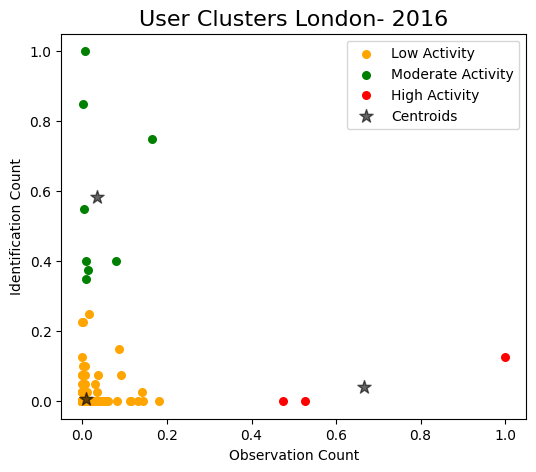

Centroids:
       n_obs  n_idents
0  0.001155  0.003388
1  0.001424  0.507336
2  1.000000  0.054054
Sum of Squared Error (SSE): 0.6790625409449693


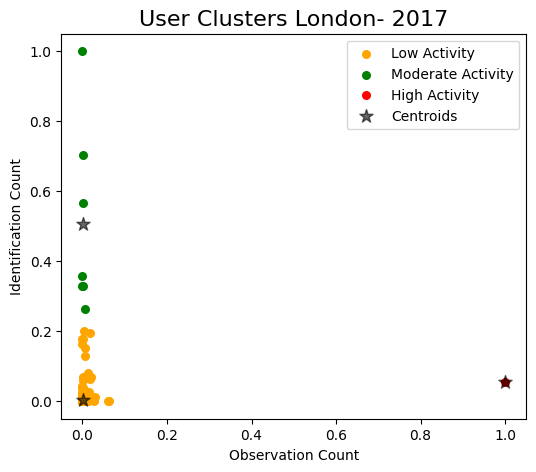

Centroids:
       n_obs  n_idents
0  0.001133  0.002236
1  1.000000  0.031746
2  0.004705  0.960979
Sum of Squared Error (SSE): 0.654107438304874


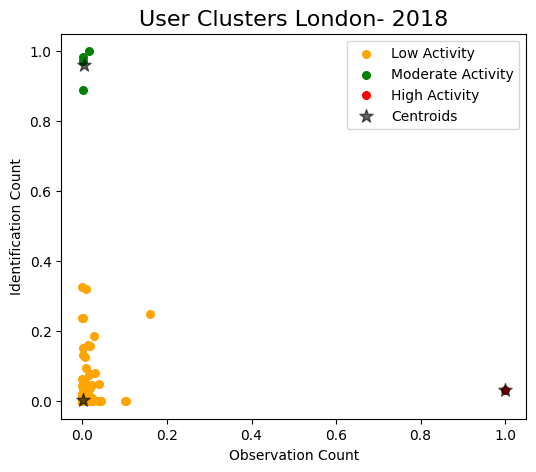

Centroids:
       n_obs  n_idents
0  0.001361  0.001191
1  0.047612  0.607168
2  1.000000  0.166452
Sum of Squared Error (SSE): 1.3106394670760189


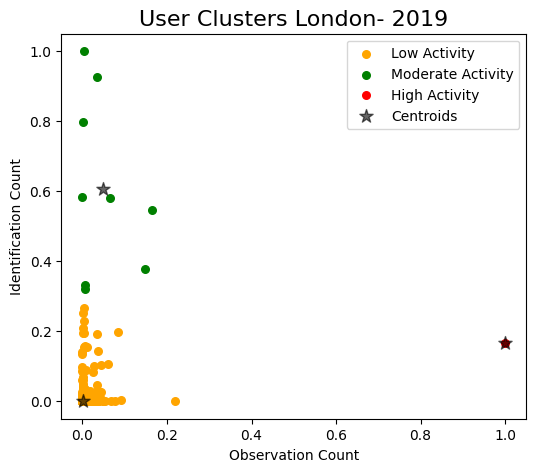

Centroids:
       n_obs  n_idents
0  0.001071  0.000527
1  0.174957  0.672437
2  1.000000  0.001946
Sum of Squared Error (SSE): 0.9211885611506225


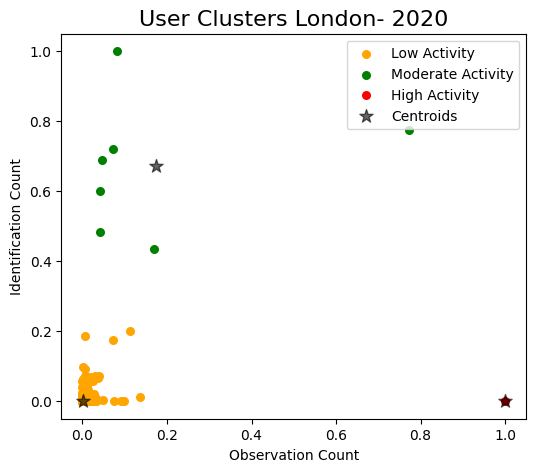

Centroids:
       n_obs  n_idents
0  0.001682  0.000230
1  0.737162  0.500167
2  0.193704  0.137998
Sum of Squared Error (SSE): 1.237801863535599


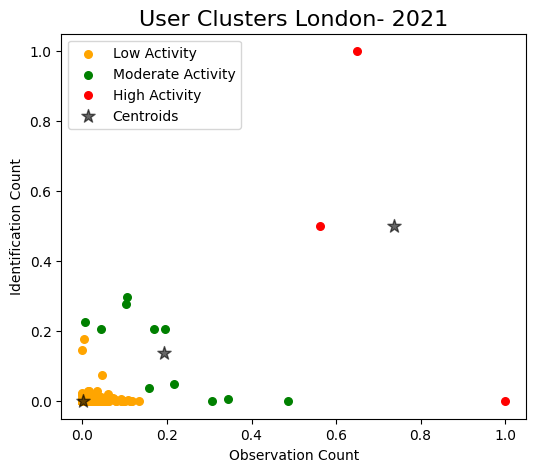

Centroids:
       n_obs  n_idents
0  0.001543  0.000244
1  0.379333  0.278066
2  1.000000  0.009935
Sum of Squared Error (SSE): 1.490810276906936


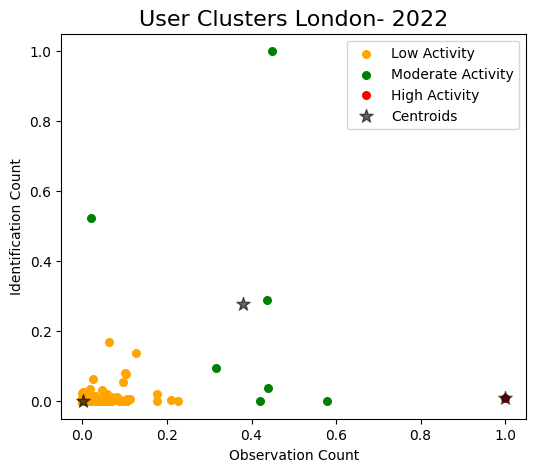

Centroids:
       n_obs  n_idents
0  0.001559  0.000283
1  0.943586  0.070248
2  0.323596  0.138575
Sum of Squared Error (SSE): 1.662182499719183


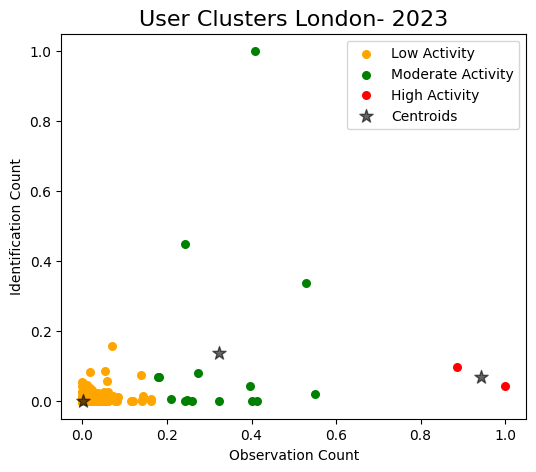

In [23]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_kmeans_clustering(df_processed, year)

## Perform K-means with optimal number of clusters 3 with log transformation

In [24]:
def log_transform(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Add +1 to avoid log(0)
    df_std['n_obs'] = df_std['n_obs'] + 1
    df_std['n_idents'] = df_std['n_idents'] + 1

    # Apply log transformation
    df_std['n_obs'] = np.log(df_std['n_obs'])
    df_std['n_idents'] = np.log(df_std['n_idents'])

    # Scale the log-transformed features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler


def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters London - {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
       n_obs  n_idents
0  0.230217  0.678783
1  0.052349  0.013810
2  0.431197  0.038609
Sum of Squared Error (SSE): 5.4433535742501284


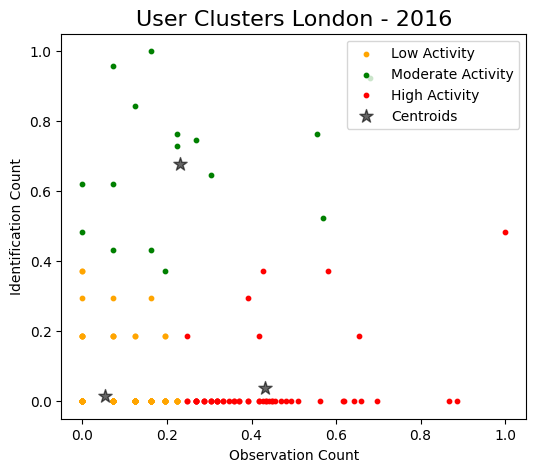

Centroids:
       n_obs  n_idents
0  0.254936  0.019154
1  0.032232  0.005489
2  0.236314  0.586037
Sum of Squared Error (SSE): 5.537233853706547


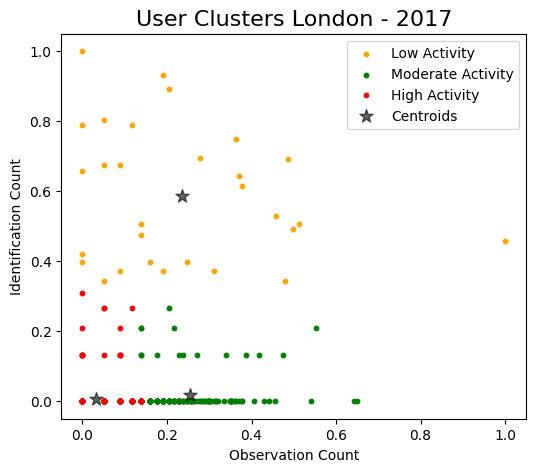

Centroids:
       n_obs  n_idents
0  0.029367  0.005167
1  0.261311  0.015549
2  0.313252  0.497827
Sum of Squared Error (SSE): 13.104785870668636


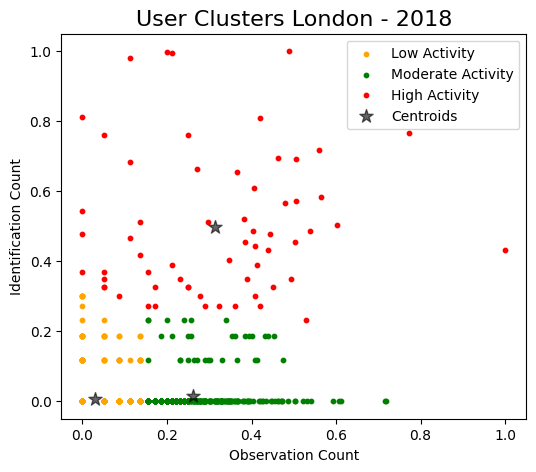

Centroids:
       n_obs  n_idents
0  0.035327  0.003439
1  0.323941  0.546570
2  0.268389  0.018008
Sum of Squared Error (SSE): 28.690927153645426


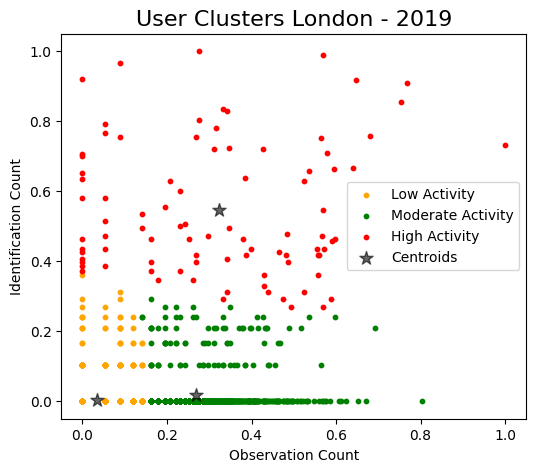

Centroids:
       n_obs  n_idents
0  0.254426  0.008918
1  0.387884  0.426558
2  0.035702  0.003715
Sum of Squared Error (SSE): 30.191293682265517


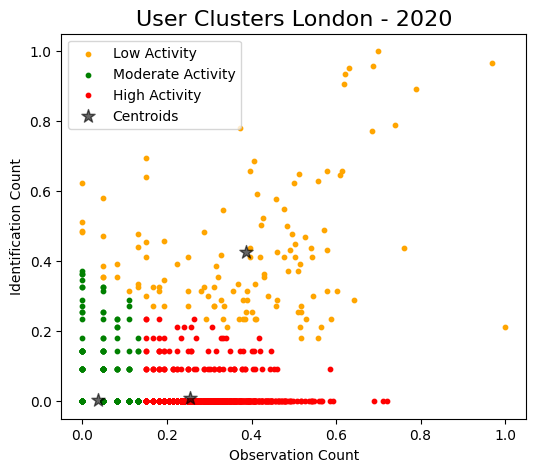

Centroids:
       n_obs  n_idents
0  0.029237  0.003497
1  0.239042  0.008483
2  0.511566  0.271575
Sum of Squared Error (SSE): 32.407888682154244


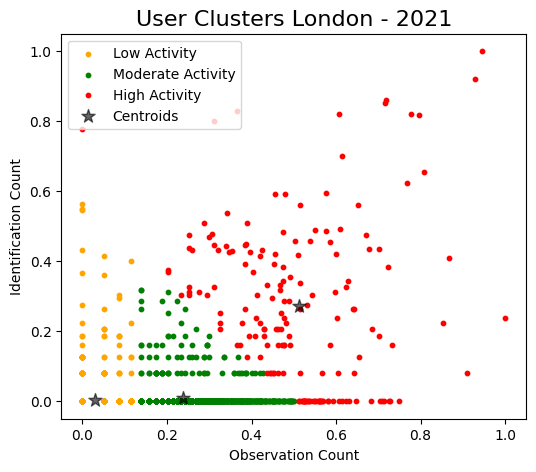

Centroids:
       n_obs  n_idents
0  0.033944  0.003617
1  0.259108  0.010807
2  0.449312  0.392423
Sum of Squared Error (SSE): 36.584054943279


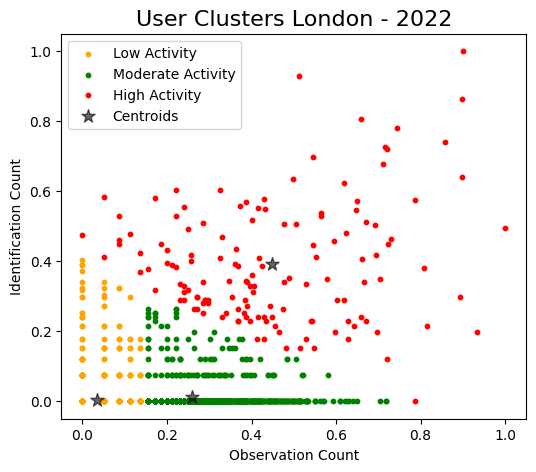

Centroids:
       n_obs  n_idents
0  0.032759  0.004314
1  0.420204  0.404896
2  0.269753  0.011048
Sum of Squared Error (SSE): 48.935359069208445


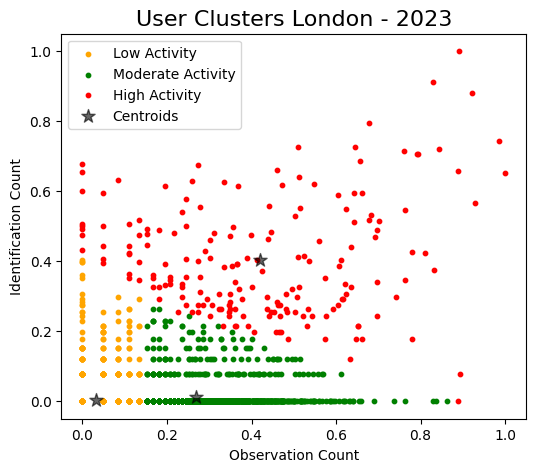

In [25]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = log_transform(df)
    perform_kmeans_clustering(df_processed, year)

Centroids:
       n_obs  n_idents
0  0.032871  0.003929
1  0.255941  0.010195
2  0.409526  0.383201
Sum of Squared Error (SSE): 178.50931481803403


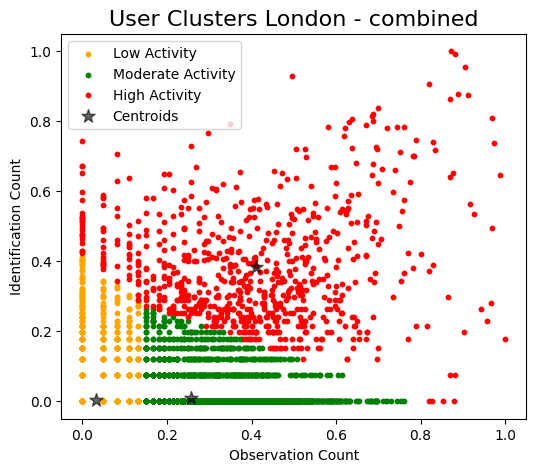

(      user_id     n_obs  n_idents  cluster     activity_level
 231        54  0.082978       0.0        0       Low Activity
 2226       54  0.204079       0.0        1  Moderate Activity
 1571       54  0.149971       0.0        1  Moderate Activity
 454        54  0.000000       0.0        0       Low Activity
 1031       54  0.342640       0.0        1  Moderate Activity
 ...       ...       ...       ...      ...                ...
 6499  8133550  0.082978       0.0        0       Low Activity
 6501  8134698  0.000000       0.0        0       Low Activity
 5728  8139491  0.000000       0.0        0       Low Activity
 6506  8140982  0.000000       0.0        0       Low Activity
 6507  8140994  0.000000       0.0        0       Low Activity
 
 [28825 rows x 5 columns],
 178.50931481803403)

In [26]:
# Concatenate all the DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = log_transform(combined_df)

# Perform clustering with 3 clusters on combined data
perform_kmeans_clustering(df_combined_processed, "combined")

Centroids:
       n_obs  n_idents
0  0.035519  0.584375
1  0.008286  0.006442
2  0.667274  0.041667
Sum of Squared Error (SSE): 1.051394657950587


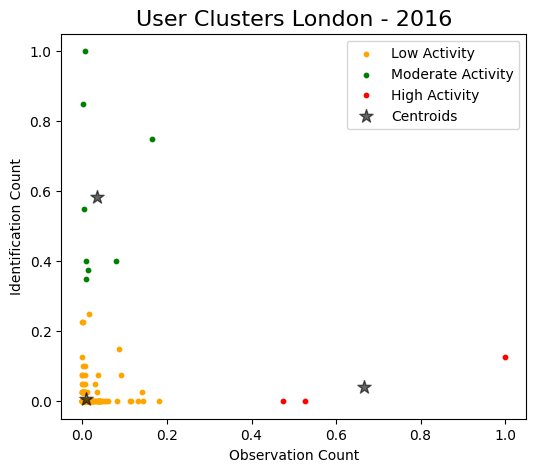

Year: 2016
(     user_id     n_obs  n_idents  cluster activity_level
231       54  0.003643     0.000        0   Low Activity
254      429  0.007286     0.075        0   Low Activity
0        484  0.112933     0.000        0   Low Activity
12       505  0.029144     0.000        0   Low Activity
23       819  0.010929     0.000        0   Low Activity
..       ...       ...       ...      ...            ...
314  7058583  0.081967     0.000        0   Low Activity
321  7469737  0.000000     0.000        0   Low Activity
329  7720680  0.000000     0.000        0   Low Activity
331  7775033  0.000000     0.000        0   Low Activity
334  7860013  0.000000     0.000        0   Low Activity

[337 rows x 5 columns], 1.051394657950587)
Centroids:
       n_obs  n_idents
0  0.001155  0.003388
1  0.001424  0.507336
2  1.000000  0.054054
Sum of Squared Error (SSE): 0.6790625409449693


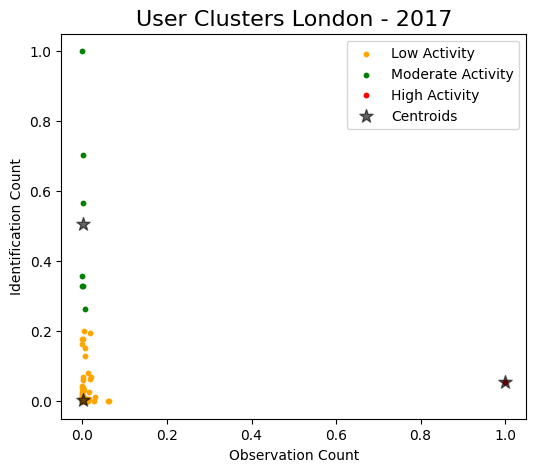

Year: 2017
(     user_id     n_obs  n_idents  cluster activity_level
454       54  0.000000  0.000000        0   Low Activity
275      484  0.029322  0.010811        0   Low Activity
69       505  0.006324  0.000000        0   Low Activity
50      1245  0.000000  0.162162        0   Low Activity
39      1850  0.062668  0.000000        0   Low Activity
..       ...       ...       ...      ...            ...
621  7837944  0.000383  0.000000        0   Low Activity
626  7838690  0.000000  0.000000        0   Low Activity
615  7851757  0.000000  0.000000        0   Low Activity
617  7865208  0.000767  0.000000        0   Low Activity
620  7915128  0.000000  0.000000        0   Low Activity

[627 rows x 5 columns], 0.6790625409449693)
Centroids:
       n_obs  n_idents
0  0.001133  0.002236
1  1.000000  0.031746
2  0.004705  0.960979
Sum of Squared Error (SSE): 0.654107438304874


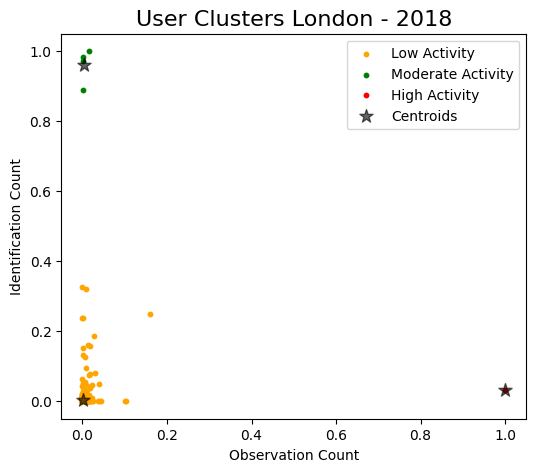

Year: 2018
(      user_id     n_obs  n_idents  cluster activity_level
1571       54  0.000778  0.000000        0   Low Activity
29        484  0.023639  0.044974        0   Low Activity
502       505  0.000933  0.000000        0   Low Activity
404      1245  0.001400  0.023810        0   Low Activity
343      2111  0.000156  0.000000        0   Low Activity
...       ...       ...       ...      ...            ...
1804  7915886  0.000000  0.000000        0   Low Activity
1805  7944151  0.000156  0.000000        0   Low Activity
1814  7955388  0.000156  0.000000        0   Low Activity
1812  7968806  0.000000  0.000000        0   Low Activity
1817  8123763  0.000467  0.000000        0   Low Activity

[1819 rows x 5 columns], 0.654107438304874)
Centroids:
       n_obs  n_idents
0  0.001361  0.001191
1  0.047612  0.607168
2  1.000000  0.166452
Sum of Squared Error (SSE): 1.3106394670760189


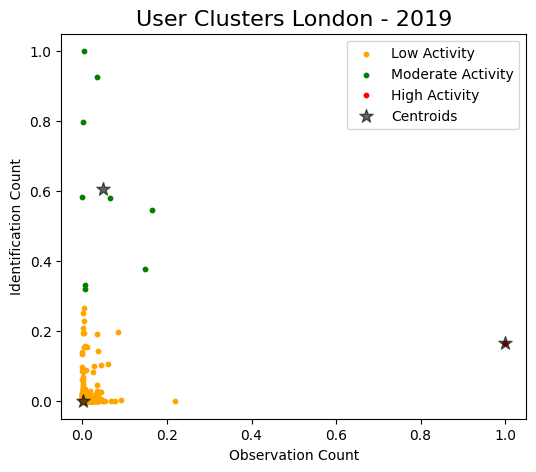

Year: 2019
(      user_id     n_obs  n_idents  cluster activity_level
2226       54  0.001974       0.0        0   Low Activity
4087      429  0.000658       0.0        0   Low Activity
1287      484  0.008991       0.0        0   Low Activity
3681      520  0.009868       0.0        0   Low Activity
3653     1179  0.001974       0.0        0   Low Activity
...       ...       ...       ...      ...            ...
4358  7879384  0.000000       0.0        0   Low Activity
4360  7912593  0.000439       0.0        0   Low Activity
4361  7926338  0.000000       0.0        0   Low Activity
4366  7968806  0.000219       0.0        0   Low Activity
4368  8123763  0.000000       0.0        0   Low Activity

[4371 rows x 5 columns], 1.3106394670760189)
Centroids:
       n_obs  n_idents
0  0.001071  0.000527
1  0.174957  0.672437
2  1.000000  0.001946
Sum of Squared Error (SSE): 0.9211885611506225


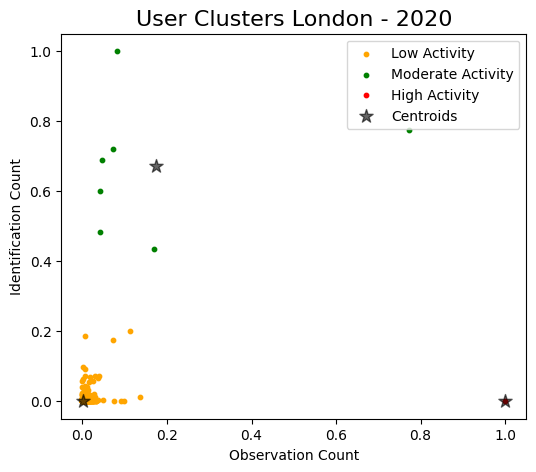

Year: 2020
(      user_id     n_obs  n_idents  cluster activity_level
1031       54  0.003888   0.00000        0   Low Activity
774       484  0.016378   0.00292        0   Low Activity
1265     1245  0.002474   0.00000        0   Low Activity
4356     1254  0.000000   0.00000        0   Low Activity
1318     1439  0.000236   0.00000        0   Low Activity
...       ...       ...       ...      ...            ...
4737  7944151  0.000236   0.00000        0   Low Activity
4742  7968806  0.000000   0.00000        0   Low Activity
4741  8016959  0.000000   0.00000        0   Low Activity
4739  8025822  0.000118   0.00000        0   Low Activity
4743  8105830  0.000000   0.00000        0   Low Activity

[4748 rows x 5 columns], 0.9211885611506225)
Centroids:
       n_obs  n_idents
0  0.001682  0.000230
1  0.737162  0.500167
2  0.193704  0.137998
Sum of Squared Error (SSE): 1.237801863535599


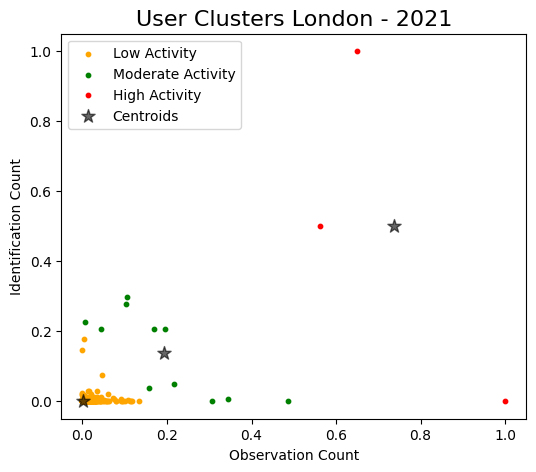

Year: 2021
(      user_id     n_obs  n_idents  cluster activity_level
2017       54  0.000676    0.0000        0   Low Activity
3093      429  0.000338    0.0005        0   Low Activity
561       484  0.000676    0.0000        0   Low Activity
95       1245  0.002027    0.0000        0   Low Activity
3739     1439  0.000000    0.0000        0   Low Activity
...       ...       ...       ...      ...            ...
4669  7790106  0.000000    0.0000        0   Low Activity
4674  7879384  0.000338    0.0000        0   Low Activity
4680  7948882  0.000169    0.0000        0   Low Activity
4679  7978197  0.000169    0.0000        0   Low Activity
4682  8105830  0.000000    0.0000        0   Low Activity

[4686 rows x 5 columns], 1.237801863535599)
Centroids:
       n_obs  n_idents
0  0.001543  0.000244
1  0.379333  0.278066
2  1.000000  0.009935
Sum of Squared Error (SSE): 1.490810276906936


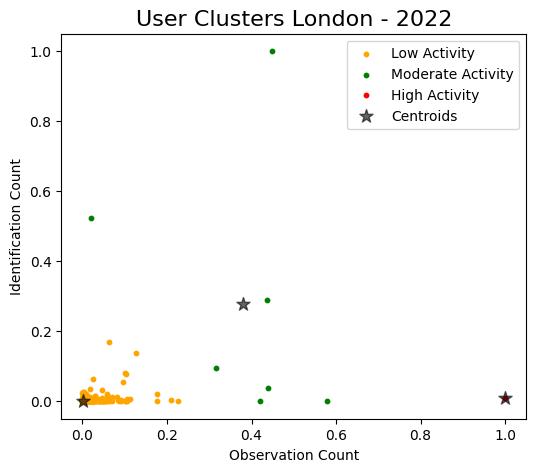

Year: 2022
(      user_id     n_obs  n_idents  cluster activity_level
1182     1245  0.000615  0.000000        0   Low Activity
4975     2491  0.000000  0.000000        0   Low Activity
938      3320  0.002924  0.001435        0   Low Activity
4587     3434  0.000000  0.000000        0   Low Activity
4365     4079  0.000769  0.000110        0   Low Activity
...       ...       ...       ...      ...            ...
5715  8008034  0.000000  0.000000        0   Low Activity
5723  8016959  0.000000  0.000000        0   Low Activity
5718  8060339  0.000000  0.000000        0   Low Activity
5725  8090689  0.000000  0.000000        0   Low Activity
5728  8139491  0.000000  0.000000        0   Low Activity

[5729 rows x 5 columns], 1.490810276906936)
Centroids:
       n_obs  n_idents
0  0.001559  0.000283
1  0.943586  0.070248
2  0.323596  0.138575
Sum of Squared Error (SSE): 1.662182499719183


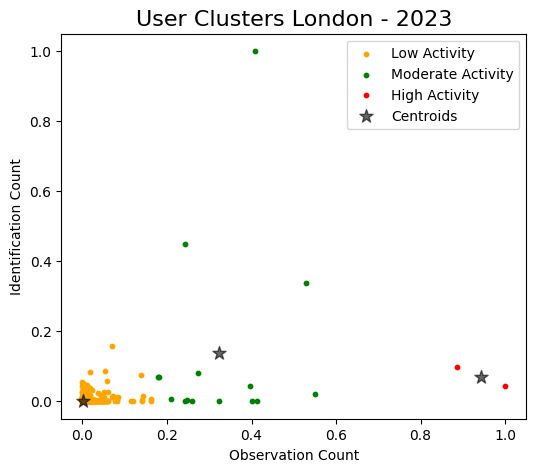

Year: 2023
(      user_id     n_obs  n_idents  cluster activity_level
1552      317  0.002856  0.000000        0   Low Activity
5724      355  0.000260  0.000000        0   Low Activity
5843      362  0.000000  0.004218        0   Low Activity
1445      484  0.000260  0.000000        0   Low Activity
5500      505  0.005323  0.000000        0   Low Activity
...       ...       ...       ...      ...            ...
6498  8133192  0.000000  0.000000        0   Low Activity
6499  8133550  0.000260  0.000000        0   Low Activity
6501  8134698  0.000000  0.000000        0   Low Activity
6506  8140982  0.000000  0.000000        0   Low Activity
6507  8140994  0.000000  0.000000        0   Low Activity

[6508 rows x 5 columns], 1.662182499719183)


In [27]:

df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store the processed DataFrames for each year
clustered_dfs = {}

# Process each DataFrame
for df, year in zip(df_list, years):
    df['year'] = year  # Add year information to handle manual reassignment
    df_processed, scaler = selectfeature(df)
    df_clustered = perform_kmeans_clustering(df_processed, year)
    
    # Store the resulting DataFrame in the dictionary
    clustered_dfs[year] = df_clustered

    # Print to verify (optional)
    print(f"Year: {year}")
    print(df_clustered)
    
    df_2016_clustered = clustered_dfs[2016]
    df_2016_clustered

In [28]:
df_2019_clustered = clustered_dfs[2019]
df_2019_clustered

(      user_id     n_obs  n_idents  cluster activity_level
 2226       54  0.001974       0.0        0   Low Activity
 4087      429  0.000658       0.0        0   Low Activity
 1287      484  0.008991       0.0        0   Low Activity
 3681      520  0.009868       0.0        0   Low Activity
 3653     1179  0.001974       0.0        0   Low Activity
 ...       ...       ...       ...      ...            ...
 4358  7879384  0.000000       0.0        0   Low Activity
 4360  7912593  0.000439       0.0        0   Low Activity
 4361  7926338  0.000000       0.0        0   Low Activity
 4366  7968806  0.000219       0.0        0   Low Activity
 4368  8123763  0.000000       0.0        0   Low Activity
 
 [4371 rows x 5 columns],
 1.3106394670760189)

In [29]:
df_2021_clustered = clustered_dfs[2021]
df_2021_clustered

(      user_id     n_obs  n_idents  cluster activity_level
 2017       54  0.000676    0.0000        0   Low Activity
 3093      429  0.000338    0.0005        0   Low Activity
 561       484  0.000676    0.0000        0   Low Activity
 95       1245  0.002027    0.0000        0   Low Activity
 3739     1439  0.000000    0.0000        0   Low Activity
 ...       ...       ...       ...      ...            ...
 4669  7790106  0.000000    0.0000        0   Low Activity
 4674  7879384  0.000338    0.0000        0   Low Activity
 4680  7948882  0.000169    0.0000        0   Low Activity
 4679  7978197  0.000169    0.0000        0   Low Activity
 4682  8105830  0.000000    0.0000        0   Low Activity
 
 [4686 rows x 5 columns],
 1.237801863535599)

In [46]:
#

# AgglomerativeClustering

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering as AggClust
import sys

In [32]:

# Increase the recursion limit if needed 
sys.setrecursionlimit(100)

def selectfeature(df):# without log transformation
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Scale the features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, labels):
    # Create a DataFrame 
    df_clusters = pd.DataFrame({'cluster': labels, 'n_obs': df['n_obs'], 'n_idents': df['n_idents']})

    # Calculate an aggregate metric (e.g., median) to sort clusters
    sorted_order = df_clusters.groupby('cluster').median().sort_values(by=['n_obs', 'n_idents']).index

    # Map old labels to new labels based on the sorted order
    new_labels = np.zeros_like(labels)
    for new_label, old_label in enumerate(sorted_order):
        new_labels[labels == old_label] = new_label
    
    df['cluster'] = new_labels
    return df

def perform_agglomerative_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform Agglomerative Clustering
    agglomerative = AggClust(n_clusters=3, metric='euclidean').fit(df[['n_obs', 'n_idents']])
    df['cluster'] = agglomerative.labels_
    
    # Reorder labels - Low Activity, Moderate Activity, and High Activity to be consistent
    df = reorder_labels(df, agglomerative.labels_)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    return df

def plot_clusters(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Plotting all the clusters
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=df['activity_level'].unique()[i])
        
    # Set title and labels
    plt.title(f'Agglomerative Clustering - London {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()
    
def plot_dendrogram(df):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()


In [33]:
df_std, scaler = selectfeature(df)
df_clustered = perform_agglomerative_clustering(df_std, 2019)

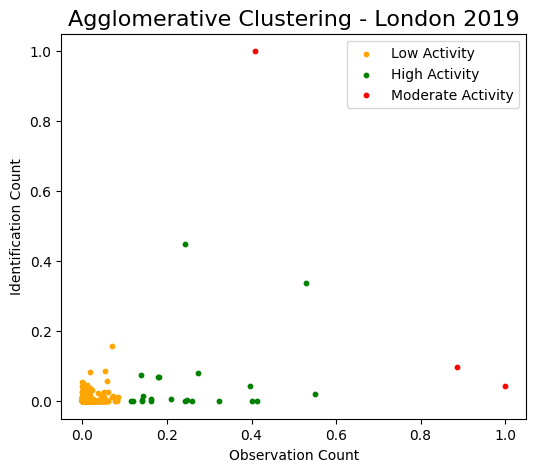

In [34]:
plot_cluster = plot_clusters(df_clustered,2019)

In [35]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_agglomerative_clustering(df_processed, year)


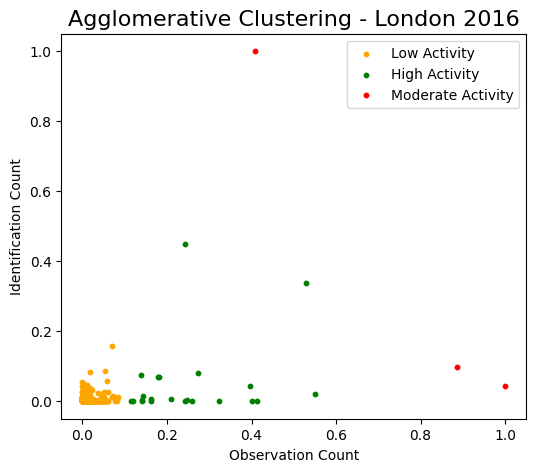

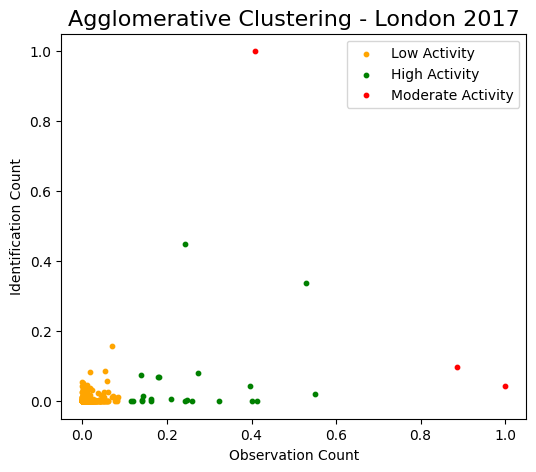

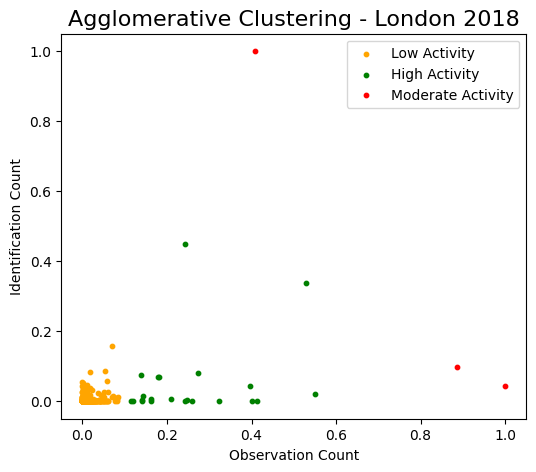

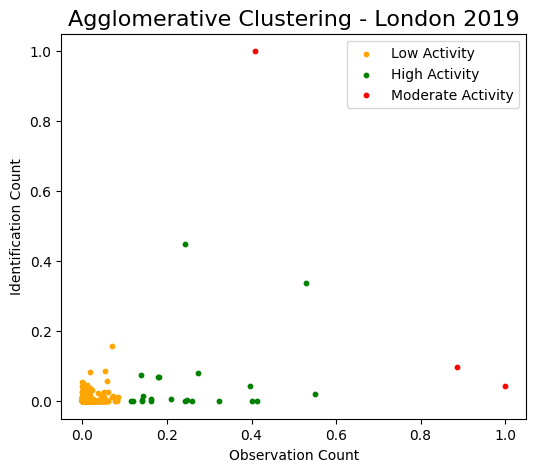

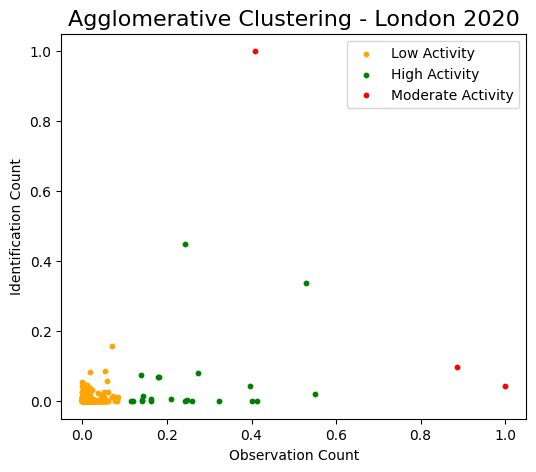

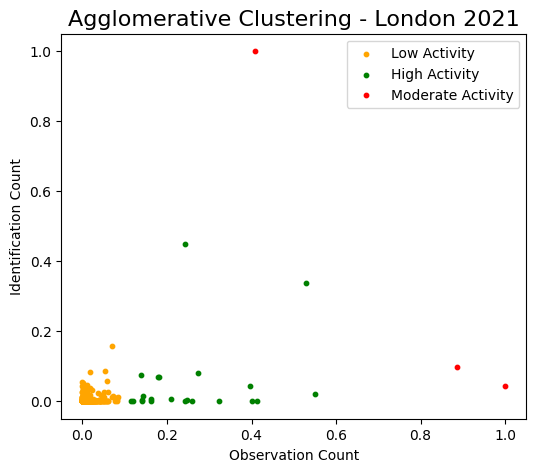

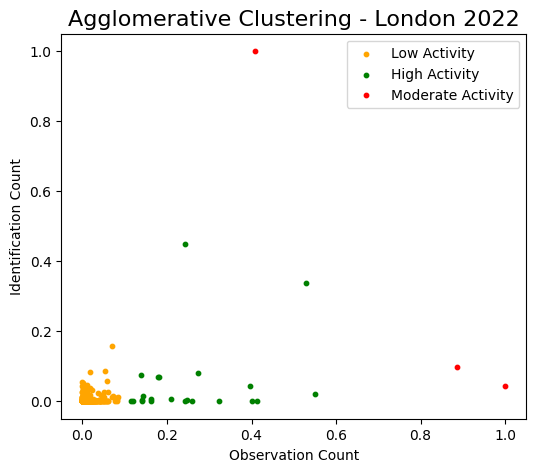

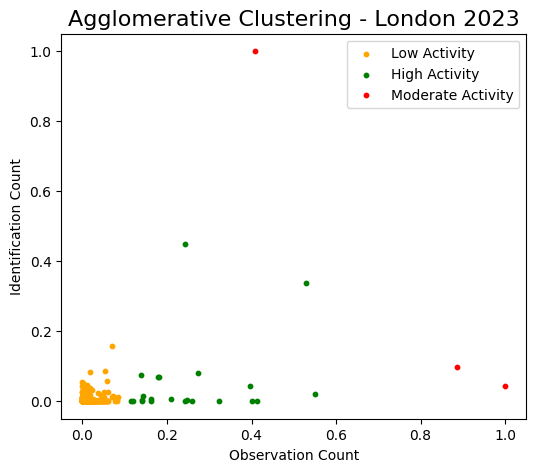

In [36]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    df_cluster = perform_agglomerative_clustering(df_processed, year)
    plot_clusters(df_clustered,year)
    


In [37]:
df_clustered

,user_id,n_obs,n_idents,cluster,activity_level
1552,317,0.002856,0.000000,0,Low Activity
5724,355,0.000260,0.000000,0,Low Activity
5843,362,0.000000,0.004218,0,Low Activity
1445,484,0.000260,0.000000,0,Low Activity
5500,505,0.005323,0.000000,0,Low Activity
...,...,...,...,...,...
6498,8133192,0.000000,0.000000,0,Low Activity
6499,8133550,0.000260,0.000000,0,Low Activity
6501,8134698,0.000000,0.000000,0,Low Activity
6506,8140982,0.000000,0.000000,0,Low Activity


In [61]:
## another method to implement 

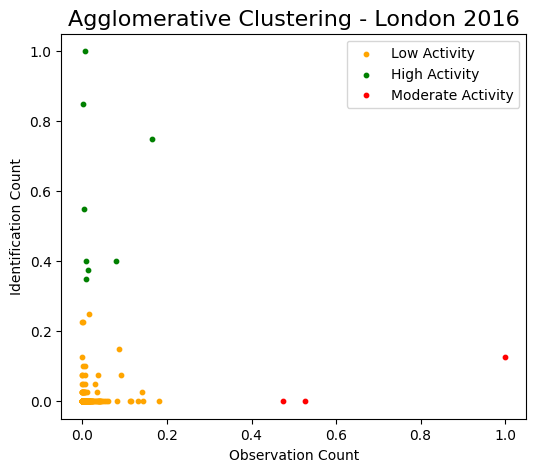

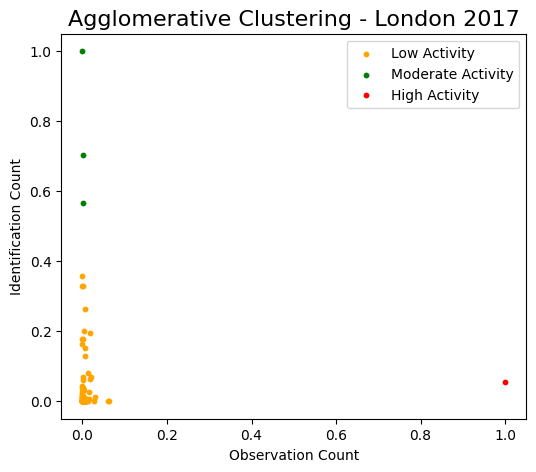

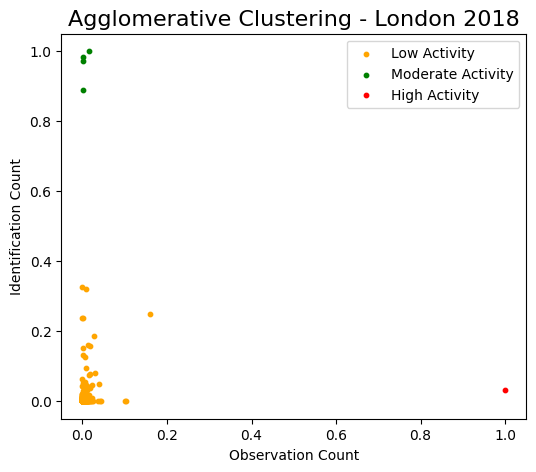

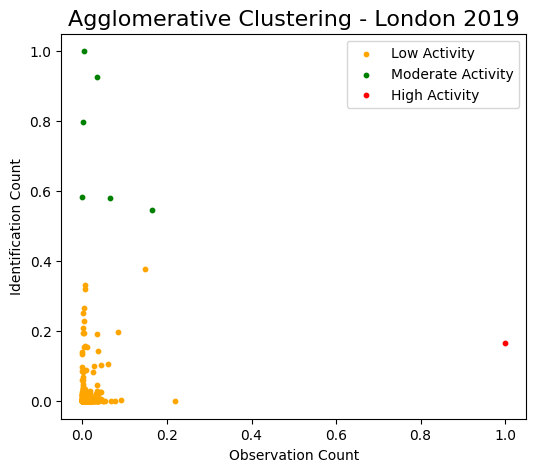

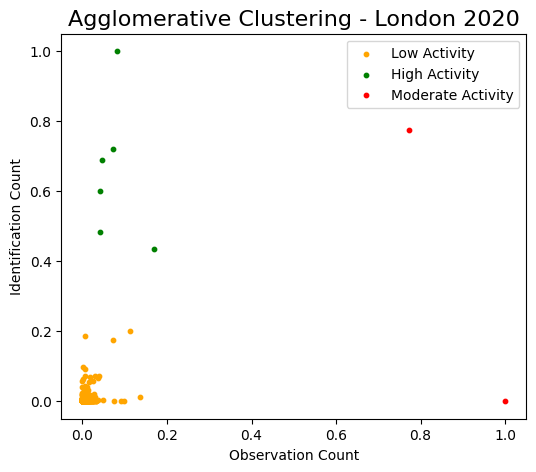

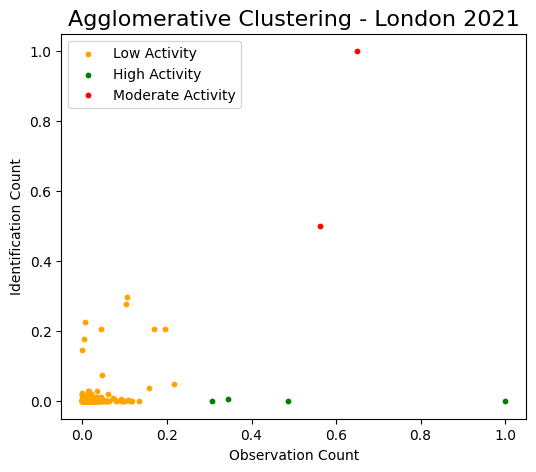

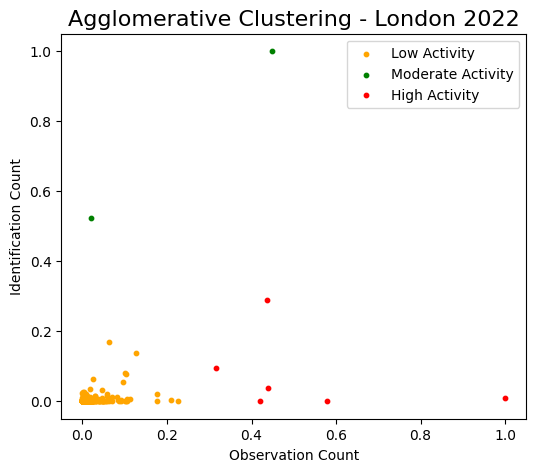

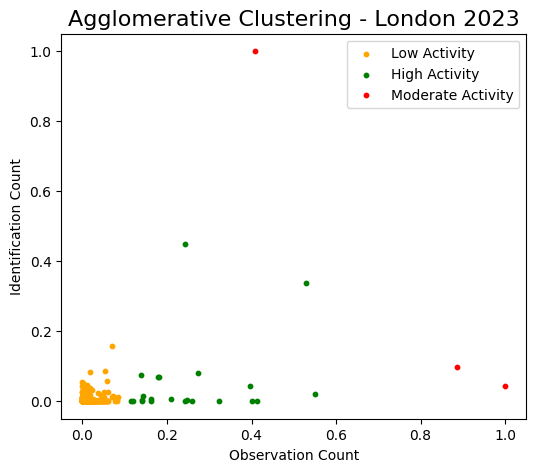

In [38]:
def process_dataframe(df, year):
    df_std, scaler = selectfeature(df)
    df_clustered = perform_agglomerative_clustering(df_std, year)
    plot_clusters(df_clustered, year)
    return df_clustered

df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for df, year in zip(df_list, years):
    processed_df = process_dataframe(df, year)

In [39]:
df_clustered

,user_id,n_obs,n_idents,cluster,activity_level
1552,317,0.002856,0.000000,0,Low Activity
5724,355,0.000260,0.000000,0,Low Activity
5843,362,0.000000,0.004218,0,Low Activity
1445,484,0.000260,0.000000,0,Low Activity
5500,505,0.005323,0.000000,0,Low Activity
...,...,...,...,...,...
6498,8133192,0.000000,0.000000,0,Low Activity
6499,8133550,0.000260,0.000000,0,Low Activity
6501,8134698,0.000000,0.000000,0,Low Activity
6506,8140982,0.000000,0.000000,0,Low Activity


In [52]:
## Dendrograms 

In [ ]:
def plot_dendrogram(df,year):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()

In [ ]:
plot_dendrogram(df_std,2019)

In [37]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# Non Linear Clustering 
## DBSCAN

In [48]:
from sklearn.cluster import DBSCAN

In [51]:
def selectfeature(df):
    # Select features
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column 
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to  two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_dbscan_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']  # 
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.2, min_samples=5).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = dbscan.labels_
    
    # Count of unique clusters
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f'Estimated number of clusters: {n_clusters}')
    print(f'Estimated number of noise points: {n_noise}')
    
    # Get unique cluster labels
    unique_labels = set(labels)
    print("Unique labels (clusters):", unique_labels)

    # Plot clusters
    plt.figure(figsize=(6, 5))
    
    # Iterate over unique labels
    for label in unique_labels:
        # Assign color or use black for noise
        if label == -1:
            color = 'black'
            label_name = 'Noise'
        else:
            color = palette[label % len(palette)]
            label_name = f'Cluster {label}'
        
        # Filter data points belonging to the current label
        cluster_data = df[df['cluster'] == label]
        plt.scatter(cluster_data['n_obs'], cluster_data['n_idents'], 
                    s=10, color=color, label=label_name)
    
    # Set title and labels
    plt.title(f'DBScan clustering - London {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df
#test
# df_std, scaler = selectfeature(df)
# df_clustered = perform_dbscan_clustering(df_std, 2023)


Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


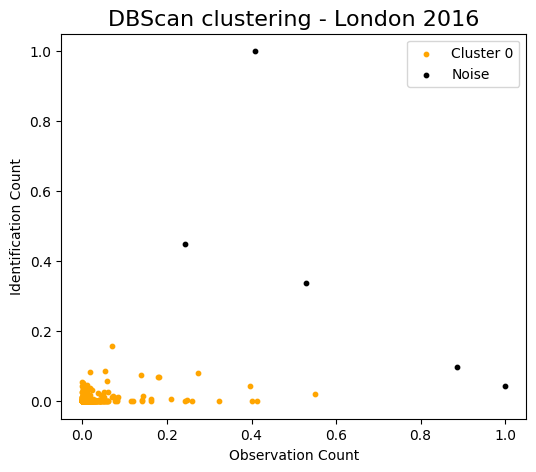

In [52]:
df_std, scaler = selectfeature(df)
df_clustered = perform_dbscan_clustering(df_std, 2016)

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


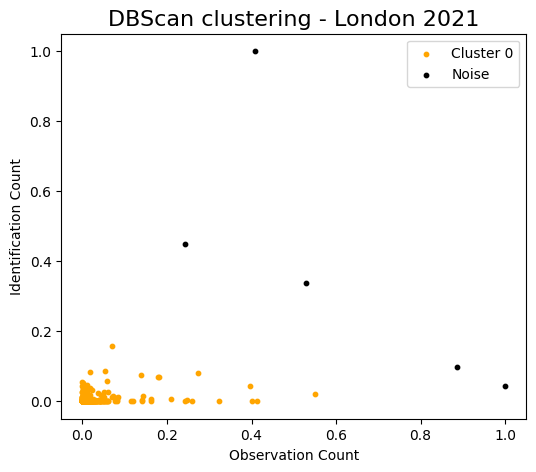

In [53]:
df_std, scaler = selectfeature(df)
df_clustered = perform_dbscan_clustering(df_std, 2021)

Estimated number of clusters: 1
Estimated number of noise points: 6
Unique labels (clusters): {0, -1}


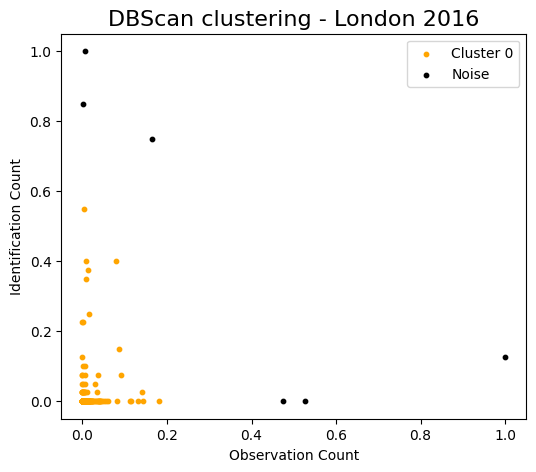

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


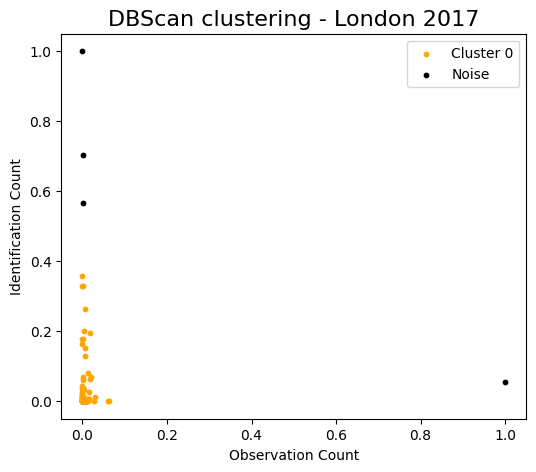

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


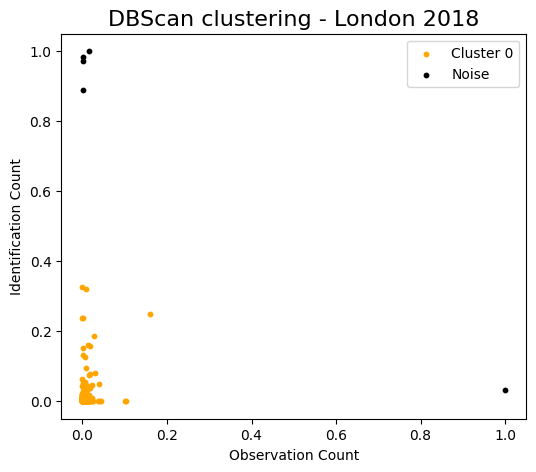

Estimated number of clusters: 1
Estimated number of noise points: 6
Unique labels (clusters): {0, -1}


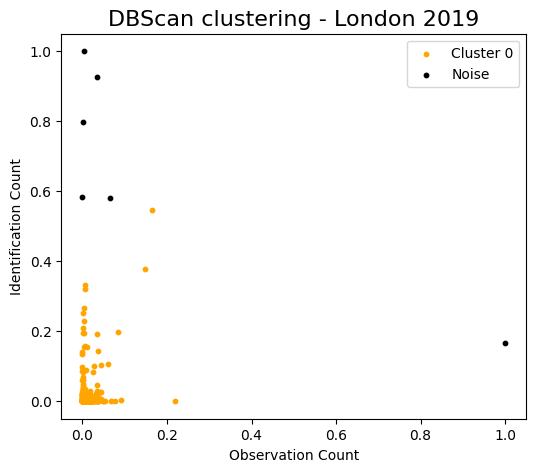

Estimated number of clusters: 1
Estimated number of noise points: 8
Unique labels (clusters): {0, -1}


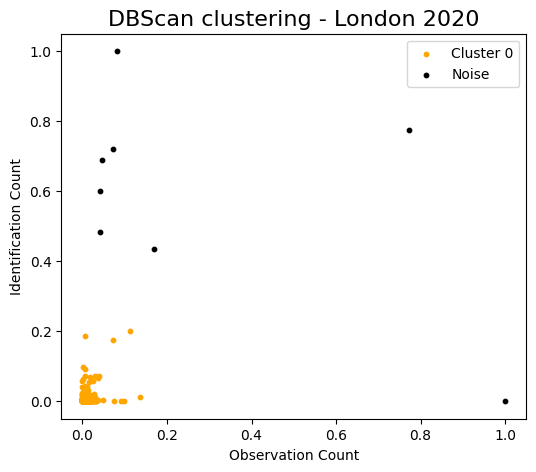

Estimated number of clusters: 1
Estimated number of noise points: 3
Unique labels (clusters): {0, -1}


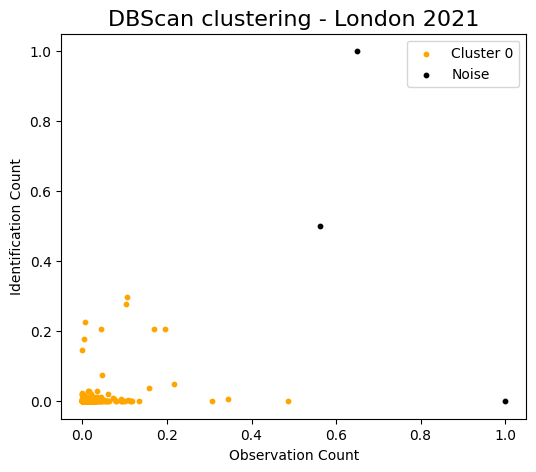

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


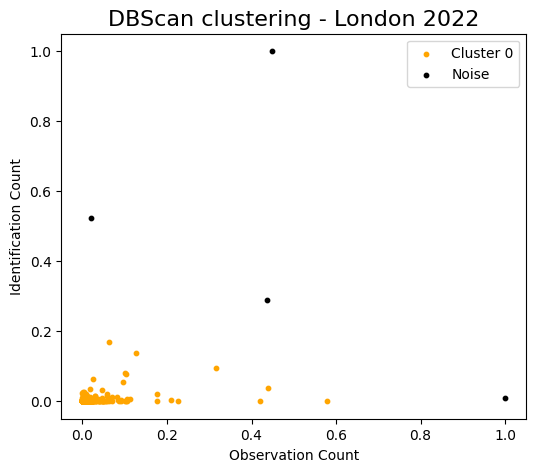

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


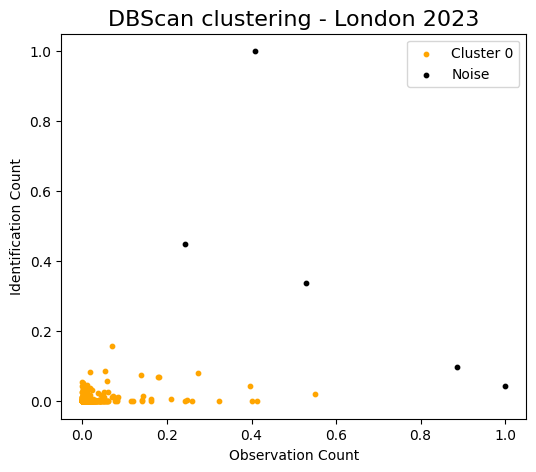

In [54]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_dbscan_clustering(df_processed, year)

Estimated number of clusters: 1
Estimated number of noise points: 8
Unique labels (clusters): {0, -1}


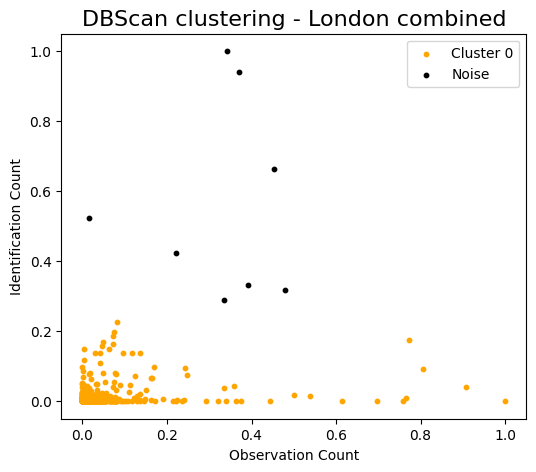

,user_id,n_obs,n_idents,cluster
231,54,0.000236,0.0,0
2226,54,0.001060,0.0,0
1571,54,0.000589,0.0,0
454,54,0.000000,0.0,0
1031,54,0.003888,0.0,0
...,...,...,...,...
6499,8133550,0.000236,0.0,0
6501,8134698,0.000000,0.0,0
5728,8139491,0.000000,0.0,0
6506,8140982,0.000000,0.0,0


In [55]:
# merge all  DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df_dbscan = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = selectfeature(combined_df_dbscan)

# Perform clustering 
perform_dbscan_clustering(df_combined_processed, "combined")

# Gaussian Mixture Model (GMM)

In [56]:
from sklearn.mixture import GaussianMixture

In [58]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_gmm_clustering(df, year):
    palette = ['orange', 'green', 'red']  # Low to High Activity
    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
    df['cluster'] = gmm.fit_predict(df[['n_obs', 'n_idents']])

    means = gmm.means_
    sorted_indices = np.argsort(means[:, 0])  # Sort by `n_obs` for consistent labeling
    new_labels = np.zeros_like(df['cluster'])
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[df['cluster'] == old_label] = new_label
    df['cluster'] = new_labels  # Apply new labels

    means_df = pd.DataFrame(means, columns=['n_obs', 'n_idents'])
    log_likelihood = gmm.score(df[['n_obs', 'n_idents']])
    
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], color=palette[i])
    plt.scatter(means[:, 0], means[:, 1], c='black', s=10, alpha=0.6, marker='*')
    plt.title(f'GMM Clusters London- {year}')
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend(['Low Activity', 'Moderate Activity', 'High Activity', 'Means'])
    plt.show()

    return df, log_likelihood
# test
# df_std, scaler = selectfeature(df)
# df_clustered, log_likelihood = perform_gmm_clustering(df_std, 2023)


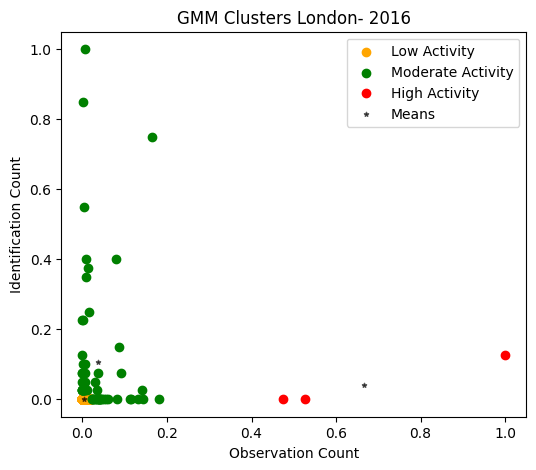

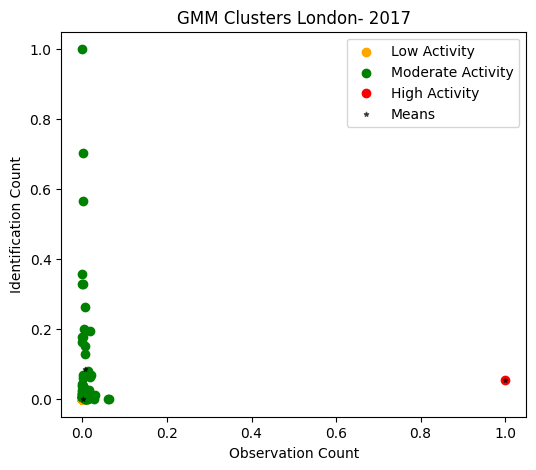

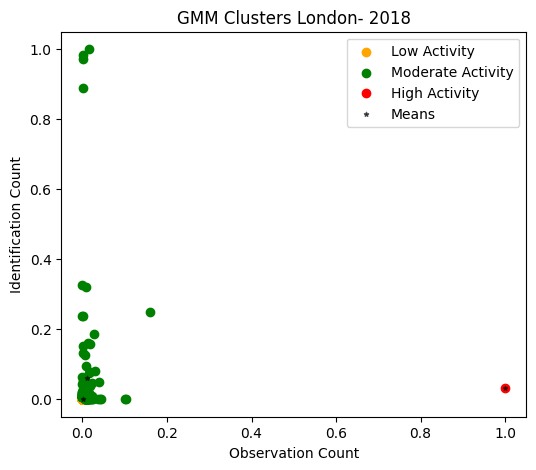

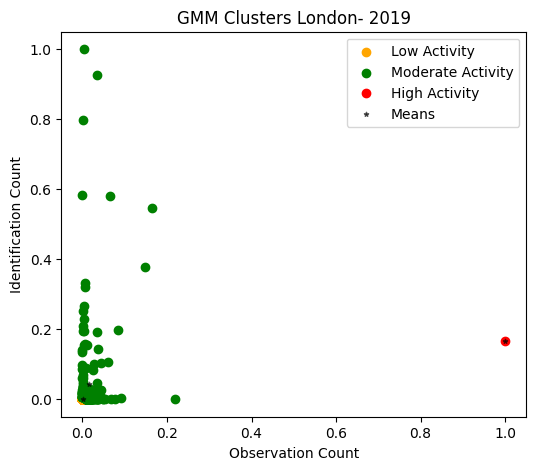

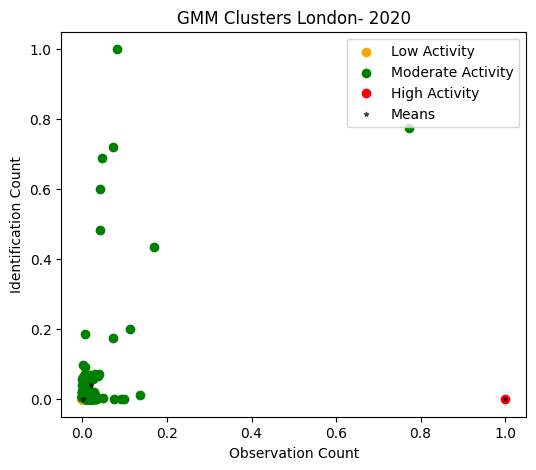

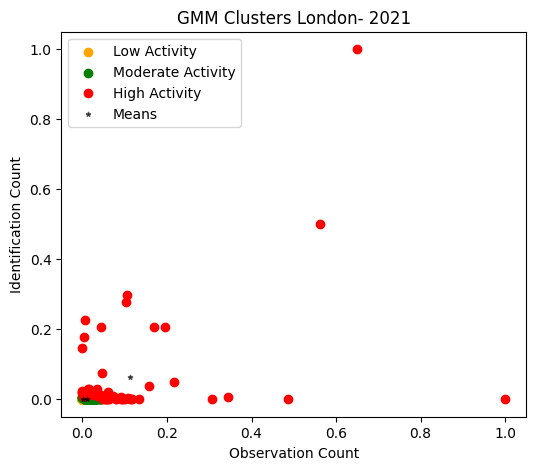

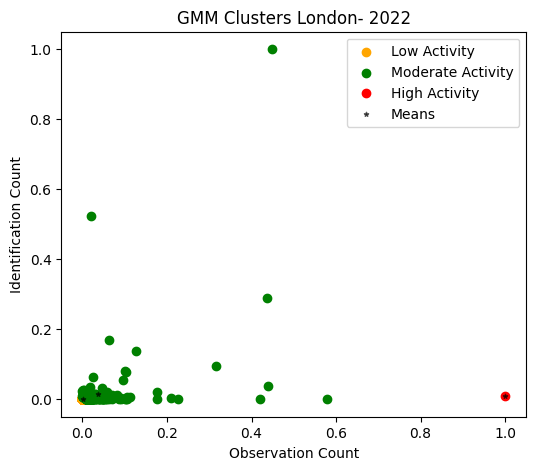

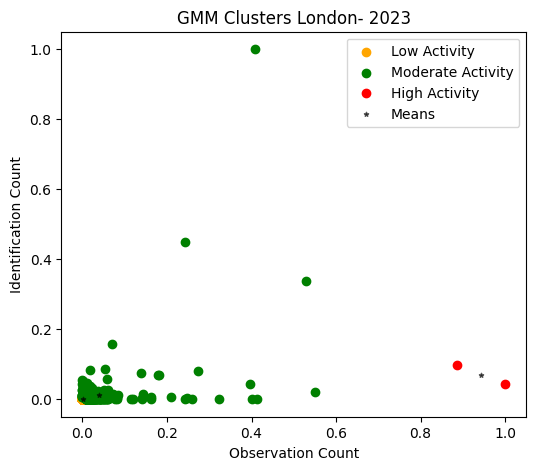

In [59]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_gmm_clustering(df_processed, year)

## Evaluating the scores to find the better model

In [62]:
from sklearn.metrics import silhouette_score

In [63]:
def perform_kmeans_clustering(df, year):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Calculate the sum of squared errors (SSE)
    sse = kmeans.inertia_
    
    return df, sse


In [64]:
# List of DataFrames and years
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each DataFrame andg year
silhouette_scores = []

for df, year in zip(df_list, years):

    # scale feature 
    df_std, scaler = selectfeature(df)
    
    # Perform K-means clustering
    df_clustered, sse = perform_kmeans_clustering(df_std, year)
    
    # get cluster lable
    clusters_kmeans = df_clustered['cluster'].values
    
    # Step 4: Calculate and store the Silhouette Score
    silhouette_avg = silhouette_score(df_std[['n_obs', 'n_idents']], clusters_kmeans)
    silhouette_scores.append((year, silhouette_avg))
    print(f"Silhouette Score for {year}: {silhouette_avg}")

Silhouette Score for 2016: 0.9379613801556431
Silhouette Score for 2017: 0.9731008581370313
Silhouette Score for 2018: 0.9927878072262271
Silhouette Score for 2019: 0.9909626451703504
Silhouette Score for 2020: 0.9952926088554944
Silhouette Score for 2021: 0.9856268423763463
Silhouette Score for 2022: 0.9931161990144447
Silhouette Score for 2023: 0.9898112524921631
